In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import calmap
import json, requests
import seaborn as sns

In [285]:
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801'

In [286]:
data=pd.read_csv('2019_nCoV_data.csv')

In [287]:
data_confirmed=pd.read_csv('covid19_confirmed_global.csv')

In [288]:
data_deaths=pd.read_csv('covid19_deaths_global.csv')

In [289]:
data_recovered=pd.read_csv('covid19_recovered_global.csv')

In [290]:
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [291]:
data.describe()                                 # the numeric columns in the dataframe will print by describe()

,Sno,Confirmed,Deaths,Recovered
count,1719.000000,1719.000000,1719.000000,1719.000000
mean,860.000000,454.596859,10.441536,44.361838
std,496.376873,3712.529032,106.638286,351.078713
min,1.000000,0.000000,0.000000,0.000000
25%,430.500000,2.000000,0.000000,0.000000
50%,860.000000,12.000000,0.000000,0.000000
75%,1289.500000,109.000000,0.000000,7.000000
max,1719.000000,59989.000000,1789.000000,7862.000000


In [292]:
data_confirmed.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,40,40,74,84,94,110,110,120,170,174
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,201,230,264,302,367,409,454,511,584,716


In [293]:
data_confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,...,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,21.823943,23.158832,2.167969,2.554688,3.675781,5.601562,8.273438,11.433594,21.789062,24.085938,...,1316.222656,1477.480469,1632.988281,1826.769531,2068.714844,2317.542969,2580.882812,2812.957031,3056.113281,3349.558594
std,24.484347,71.120822,27.805753,27.905108,34.737565,48.343840,67.557350,91.021068,223.404115,224.758713,...,6622.393162,7239.371162,7863.701629,8698.423123,9828.145417,11007.250578,12305.356049,13521.252906,14849.525365,16487.495451
min,-41.454500,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.844875,-16.237775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,5.000000,6.000000,8.000000,11.000000,11.000000,12.000000,15.000000,16.500000,17.750000
50%,23.692500,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,68.500000,74.000000,82.500000,92.000000,100.500000,106.500000,119.500000,137.000000,147.000000,152.000000
75%,41.227200,84.497525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,320.750000,358.500000,398.250000,446.250000,496.750000,570.250000,629.000000,661.750000,697.750000,743.500000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,67800.000000,67800.000000,69176.000000,74386.000000,83836.000000,101657.000000,121478.000000,140886.000000,161807.000000,188172.000000


In [294]:
data_deaths.head(2)

,Unnamed: 0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,04-01-2020,04-02-2020,04-03-2020,04-04-2020
0,NaN,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,...,4,4,4,4,4,4,4,6,6,7
1,NaN,NaN,Albania,41.1533,20.1683,0,0,0,0,0,...,6,8,10,10,11,15,15,16,17,20


In [295]:
data_deaths.describe()

,Unnamed: 0,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,04-01-2020,04-02-2020,04-03-2020,04-04-2020
count,0.0,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,...,259.000000,259.000000,259.00000,259.000000,259.000000,259.000000,259.00000,259.000000,259.000000,259.000000
mean,NaN,21.367016,22.529732,0.065637,0.069498,0.100386,0.162162,0.216216,0.316602,0.505792,...,92.548263,105.011583,118.34749,130.984556,145.104247,162.575290,180.72973,204.567568,226.976834,249.444015
std,NaN,24.868461,71.121830,1.056329,1.057914,1.493383,2.486545,3.232521,4.723370,7.767139,...,636.225273,710.920249,788.59436,859.968014,939.924845,1024.990163,1113.82787,1225.803944,1336.020523,1445.570299
min,NaN,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,NaN,7.270000,-21.031300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,NaN,23.634500,20.902977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.000000,2.00000,2.000000,2.000000,3.000000
75%,NaN,41.178850,82.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,5.500000,6.00000,7.500000,8.000000,9.500000,11.00000,13.000000,13.500000,17.000000
max,NaN,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,...,8215.000000,9134.000000,10023.00000,10779.000000,11591.000000,12428.000000,13155.00000,13915.000000,14681.000000,15362.000000


In [296]:
data_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,04-01-2020,04-02-2020,04-03-2020,04-04-2020,Unnamed: 78
0,NaN,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,...,2,2,2,2,2,5,5,10,10,10
1,NaN,NaN,Albania,41.1533,20.1683,0,0,0,0,0,...,17,31,31,33,44,52,67,76,89,99
2,NaN,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,...,29,29,31,31,37,46,61,61,62,90
3,NaN,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,...,1,1,1,1,10,10,10,10,16,21
4,NaN,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,2


In [297]:
data_recovered.describe()

,Province/State,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,04-01-2020,04-02-2020,04-03-2020,04-04-2020,Unnamed: 78
count,0.0,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,...,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,NaN,20.075212,28.434623,0.114286,0.122449,0.146939,0.159184,0.212245,0.248980,0.436735,...,498.571429,534.346939,569.040816,608.497959,671.697959,726.669388,788.477551,858.216327,921.616327,1004.702041
std,NaN,24.532731,67.826670,1.788854,1.792890,1.986337,2.053378,2.692554,2.898425,5.141549,...,4067.254609,4141.276841,4227.736340,4317.999783,4460.958845,4590.274705,4746.395613,4955.968183,5149.101195,5391.508090
min,NaN,-51.796300,-106.346800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,6.611100,-7.692100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,NaN,21.916200,22.937500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,3.000000,5.000000,5.000000,8.000000,10.000000,13.000000,20.000000,22.000000,25.000000
75%,NaN,39.399900,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,38.000000,45.000000,52.000000,66.000000,74.000000,80.000000,103.000000,124.000000,133.000000,133.000000
max,NaN,71.706900,178.065000,28.000000,28.000000,31.000000,32.000000,42.000000,45.000000,80.000000,...,61201.000000,61732.000000,62098.000000,62570.000000,62889.000000,63153.000000,63326.000000,63471.000000,63612.000000,63762.000000


In [298]:
data['Date'] = pd.to_datetime(data['Date'])

In [299]:
data['Date_date']=data['Date'].apply(lambda x:x.date())

In [364]:
df_country=data.groupby(['Country']).max().reset_index(drop=None)
print(df_country[['Country','Confirmed','Deaths','Recovered']])

                 Country  Confirmed  Deaths  Recovered
0              Australia        5.0     0.0        4.0
1                Belgium        1.0     0.0        1.0
2                 Brazil        0.0     0.0        0.0
3               Cambodia        1.0     0.0        1.0
4                 Canada        5.0     0.0        1.0
5                  China      444.0     0.0        0.0
6                  Egypt        1.0     0.0        0.0
7                Finland        1.0     0.0        1.0
8                 France       12.0     1.0        4.0
9                Germany       16.0     0.0        1.0
10             Hong Kong       60.0     1.0        2.0
11                 India        3.0     0.0        3.0
12                 Italy        3.0     0.0        0.0
13           Ivory Coast        0.0     0.0        0.0
14                 Japan       66.0     1.0       12.0
15                 Macau       10.0     0.0        5.0
16        Mainland China    59989.0  1789.0     7862.0
17        

Text(0.5, 0, 'Dates')

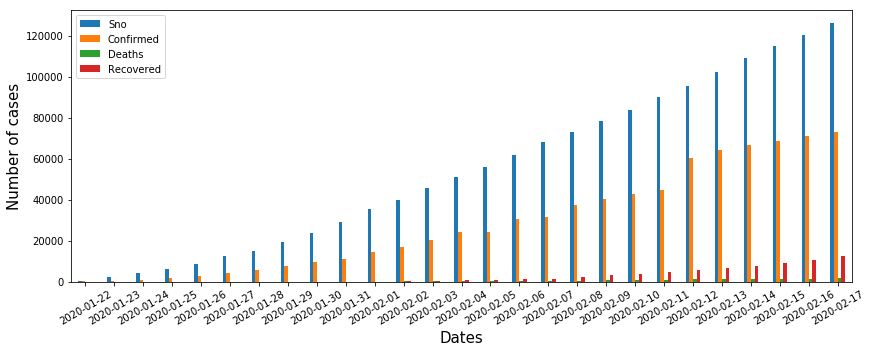

In [362]:
plt.rcParams['figure.figsize']=(14,5)

                                                              #plotting the cases by date
data.groupby(['Date_date']).sum().plot(kind='bar')
plt.xticks(rotation=30)
plt.ylabel('Number of cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)

Text(0.5, 0, 'Dates')

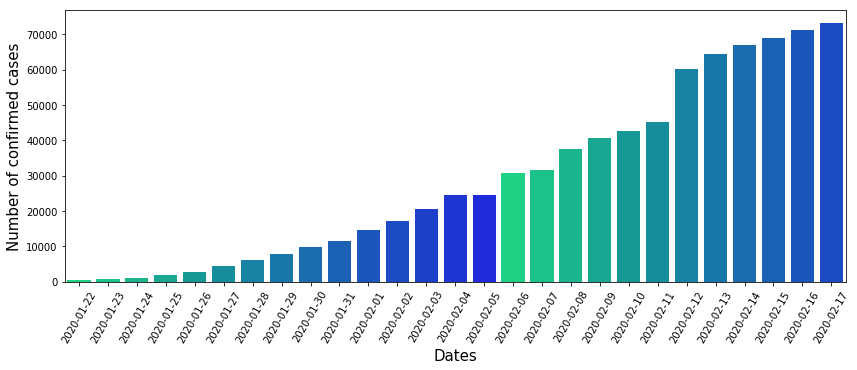

In [349]:
sns.axes_style("ticks")
sns.barplot(x="Date_date",
            y="Confirmed",
            data=data.groupby(['Date_date']).sum().reset_index(drop=None),
            palette=sns.color_palette("winter_r", 15))

plt.xticks(rotation=60)
plt.ylabel('Number of confirmed cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)

Text(0.5, 0, 'Dates')

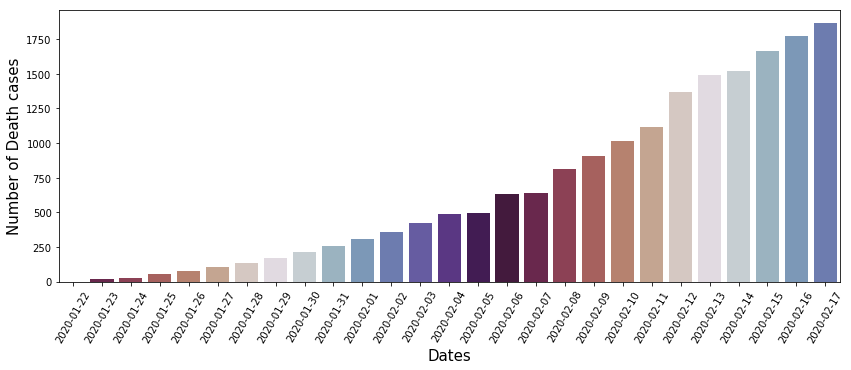

In [366]:
sns.axes_style("ticks")
sns.barplot(x="Date_date",
            y="Deaths",
            data=data.groupby(['Date_date']).sum().reset_index(drop=None),
            palette=sns.color_palette("twilight_shifted_r", 15))

plt.xticks(rotation=60)
plt.ylabel('Number of Death cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)

Text(0.5, 0, 'Dates')

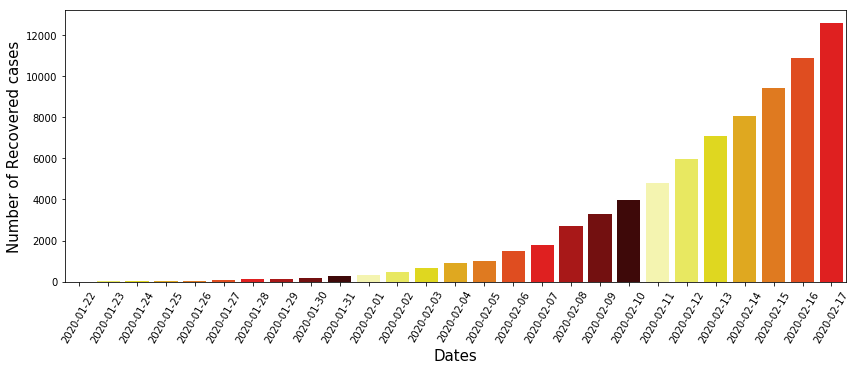

In [365]:
sns.axes_style("ticks")
sns.barplot(x="Date_date",
            y="Recovered",
            data=data.groupby(['Date_date']).sum().reset_index(drop=None),
            palette=sns.color_palette("hot_r", 10))

plt.xticks(rotation=60)
plt.ylabel('Number of Recovered cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)

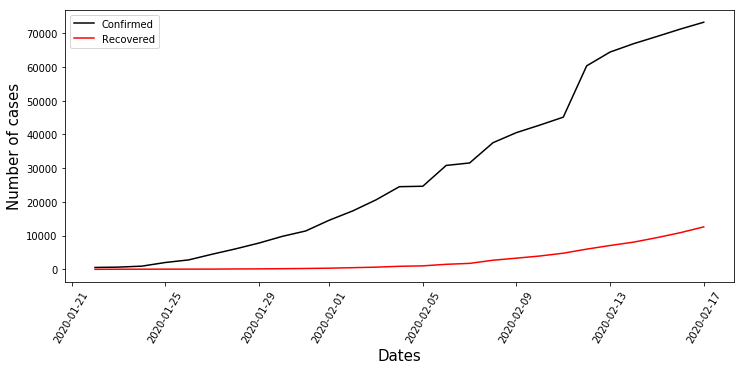

In [305]:
# PLOTING CONFIRMED VS RECOVERED GRAPH

plt.plot('Date_date', 'Confirmed', data=data.groupby(['Date_date']).sum().reset_index(drop=None), color='black')
plt.plot('Date_date', 'Recovered', data=data.groupby(['Date_date']).sum().reset_index(drop=None), color='red')
plt.xticks(rotation=60)
plt.ylabel('Number of cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)
plt.legend()
plt.show()

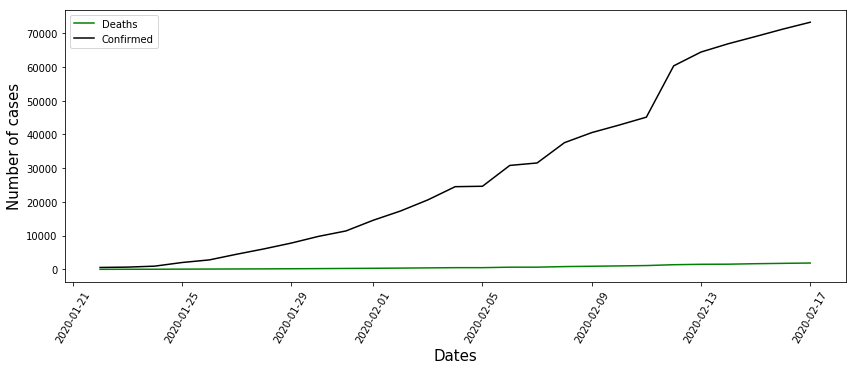

In [367]:
#PLOTING CONFIRMED VS DEATHS GRAPHS


plt.plot('Date_date', 'Deaths', data=data.groupby(['Date_date']).sum().reset_index(drop=None), color='green')
plt.plot('Date_date', 'Confirmed', data=data.groupby(['Date_date']).sum().reset_index(drop=None), color='black')
plt.xticks(rotation=60)
plt.ylabel('Number of cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)
plt.legend()
plt.show()

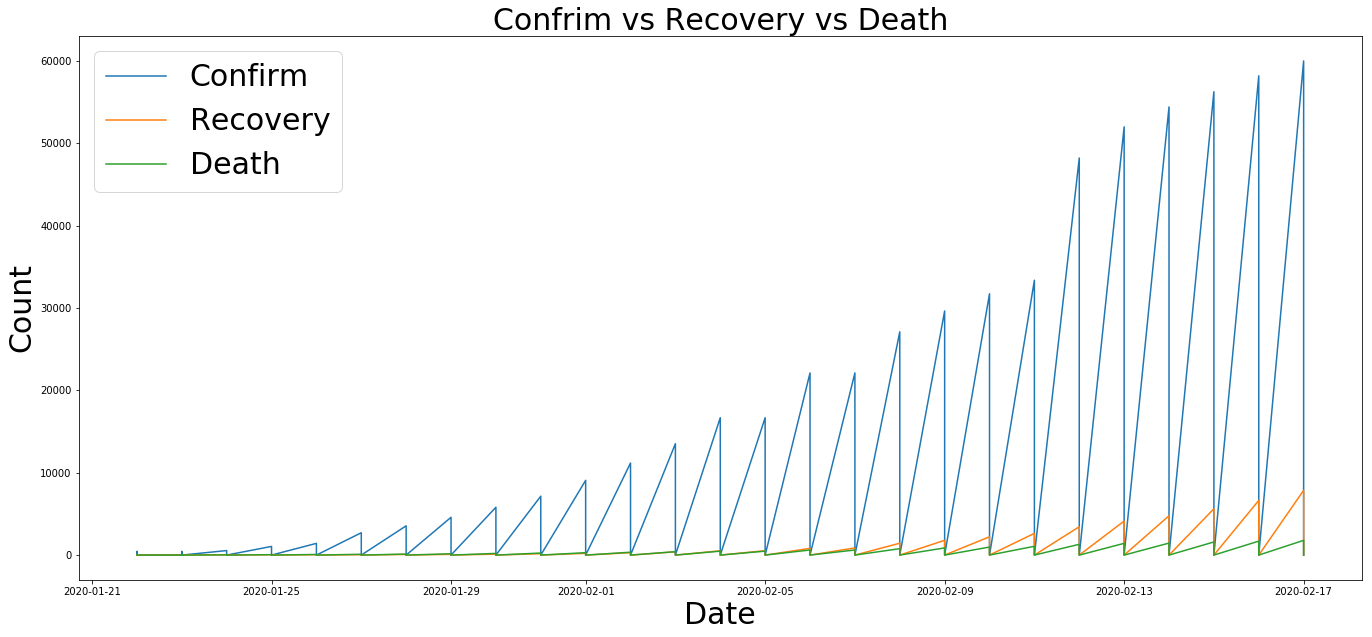

In [380]:
plt.figure(figsize=(23,10))
plt.plot(data.Date_date, data.Confirmed,label="Confirm")
plt.plot(data.Date_date, data.Recovered,label="Recovery")
plt.plot(data.Date_date, data.Deaths,label="Death")
plt.xlabel('Date',fontsize=30)
plt.ylabel("Count",fontsize=30)
plt.legend(frameon=True, fontsize=30)
plt.title('Confrim vs Recovery vs Death',fontsize=30)
plt.show()



In [402]:
temp = data.groupby('Date')['Recovered', 'Deaths', 'Confirmed'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Confirmed'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case', height=400,
             title='Cases over time', color_discrete_sequence = [rec, dth, cnf])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()



#fig = dict(data=data, layout=layout)


#plot(fig)